# <p style="text-align: center;">Book Recommendation</p>

<div>
<img src="library.jpg" width="800", height = "200"/>

<figcaption>Shakespeare and Company, Paris, France.</figcaption>
</div>

## Table of Contents:
* [Libraries](#1)
* [Book Data](#2)
* [Data Cleaning](#3)
* [EDA - Data Visualisation](#4)
* [KNN Model](#5)
* [Book Recommendations](#6)

**Problem:** Book recommendations - „I like Lord of the Rings, what else should I read?“

## 1. Libraries <a class="anchor" id="1"></a>

In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
# Import visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')


## 2. Book Data <a class="anchor" id="2"></a>

In [4]:
# Import data

books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

In [5]:
# Display the top 3 rows of books datadrame

books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [6]:
# Check the infos of books

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
# Display the top 3 rows of ratings datadrame

ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [8]:
# Check the infos of ratings

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
# Display the top 3 rows of users datadrame

users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [10]:
# Check the infos of ratings

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## 3. Data Cleaning <a class="anchor" id="3"></a>

### Books

In [11]:
# Missing values

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
# Find the missing value corrisponding to the author column

books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [13]:
# The author is unknown. Fill it with anonymous

books['Book-Author'].fillna('Anonymous', inplace = True)

In [14]:
# Find the missing value corrisponding to the publisher column

books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [15]:
# Fill the missing values with the correct ones

books['Publisher'].fillna('Mundania Press', limit = 1, inplace = True)
books['Publisher'].fillna('Bantam', limit = 1, inplace = True)

In [16]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [18]:
# Year column contains strings and numbers

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [19]:
# Display rows corrisponding to an inappropriate year of pubblication

books[books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [20]:
# Edit the row with index = 209538

books.loc[209538, 'Book-Author'] = 'Michael Teitelbaum'
books.loc[209538, 'Year-Of-Publication'] = 2000
books.loc[209538, 'Publisher'] = 'DK Publishing Inc'

In [21]:
# Check the changes

books.iloc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [22]:
# Edit the row with index = 221678

books.loc[221678, 'Book-Author'] = 'Michael Teitelbaum'
books.loc[221678, 'Year-Of-Publication'] = 2000
books.loc[221678, 'Publisher'] = 'DK Publishing Inc'

In [23]:
# Edit the row with index = 220731

books.loc[220731, 'Book-Title'] = 'Peuple du ciel, suivi de Les Bergers'
books.loc[220731, 'Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.loc[220731, 'Year-Of-Publication'] = 2002
books.loc[220731, 'Publisher'] = 'FOLIO 2 EUROS'

In [24]:
# Transform the type of year column

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [25]:
# Check values of the year column

year_of_publ = books['Year-Of-Publication'].unique()
year_of_publ.sort()
year_of_publ

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050], dtype=int64)

In [26]:
# Check books with a future year of pubblication...

books[books['Year-Of-Publication'].isin([2026,2030,2037,2038,2050])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


In [27]:
# Edit rows with future year of publication

books.loc[37487, 'Year-Of-Publication'] = 2013
books.loc[55676, 'Year-Of-Publication'] = 2013

books.loc[78168, 'Year-Of-Publication'] = 1995
books.loc[80264, 'Year-Of-Publication'] = 2015

books.loc[97826, 'Year-Of-Publication'] = 1950
books.loc[116053, 'Year-Of-Publication'] = 1938

books.loc[118294, 'Year-Of-Publication'] = 2006

books.loc[192993, 'Year-Of-Publication'] = 2003
books.loc[228173, 'Year-Of-Publication'] = 1987

books.loc[240169, 'Year-Of-Publication'] = 1930
books.loc[255409, 'Year-Of-Publication'] = 1937

books.loc[260974, 'Year-Of-Publication'] = 1991


In [28]:
# Drop the images columns

books = books.iloc[:,[0,1,2,3,4]]
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [29]:
# Check duplicates

books.duplicated().sum()

0

### Ratings

In [30]:
# Missing values

ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [31]:
# Duplicates

ratings.duplicated().sum()

0

In [32]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [33]:
# Rates

rates = ratings['Book-Rating'].unique()
rates.sort()
rates

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Users

In [34]:
# Missing values

users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [35]:
# almost 40% values of age column are missing!

users.isnull().sum()['Age'] / users.shape[0]

0.3971985741847105

In [36]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [37]:
users['Location'] = users['Location'].str.split(',')
users.head(2)

,User-ID,Location,Age
0,1,"[nyc, new york, usa]",NaN
1,2,"[stockton, california, usa]",18.0


In [38]:
# Extract country feature from location column

countries = []

for cont in users['Location']:
    
    countries.append(cont[-1])

In [39]:
# Add the country column to users

users['Country'] = countries

In [40]:
# drop Age and location columns

users = users.drop(['Age','Location'], axis = 1)
users.head(2)

,User-ID,Country
0,1,usa
1,2,usa


## 4. EDA - Data Visualisation <a class="anchor" id="4"></a>

Text(0.5, 0, 'book rate')

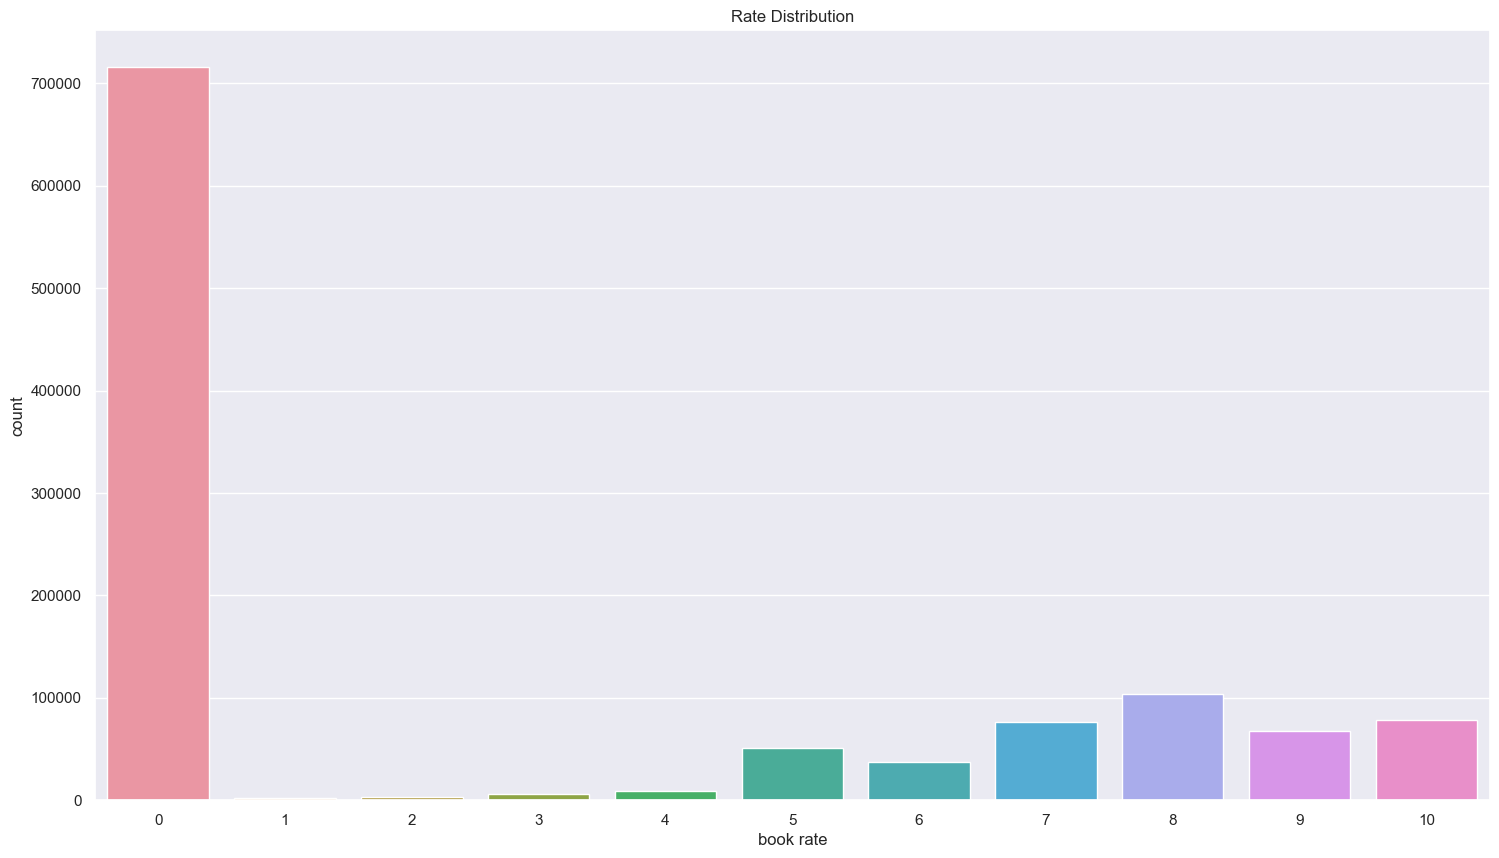

In [41]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(18, 10))

# count plot
f = sns.countplot(ratings, x = 'Book-Rating')

# set titles and axis names
f.set_title('Rate Distribution')
f.set_xlabel('book rate')

Text(0.5, 0, 'book rate')

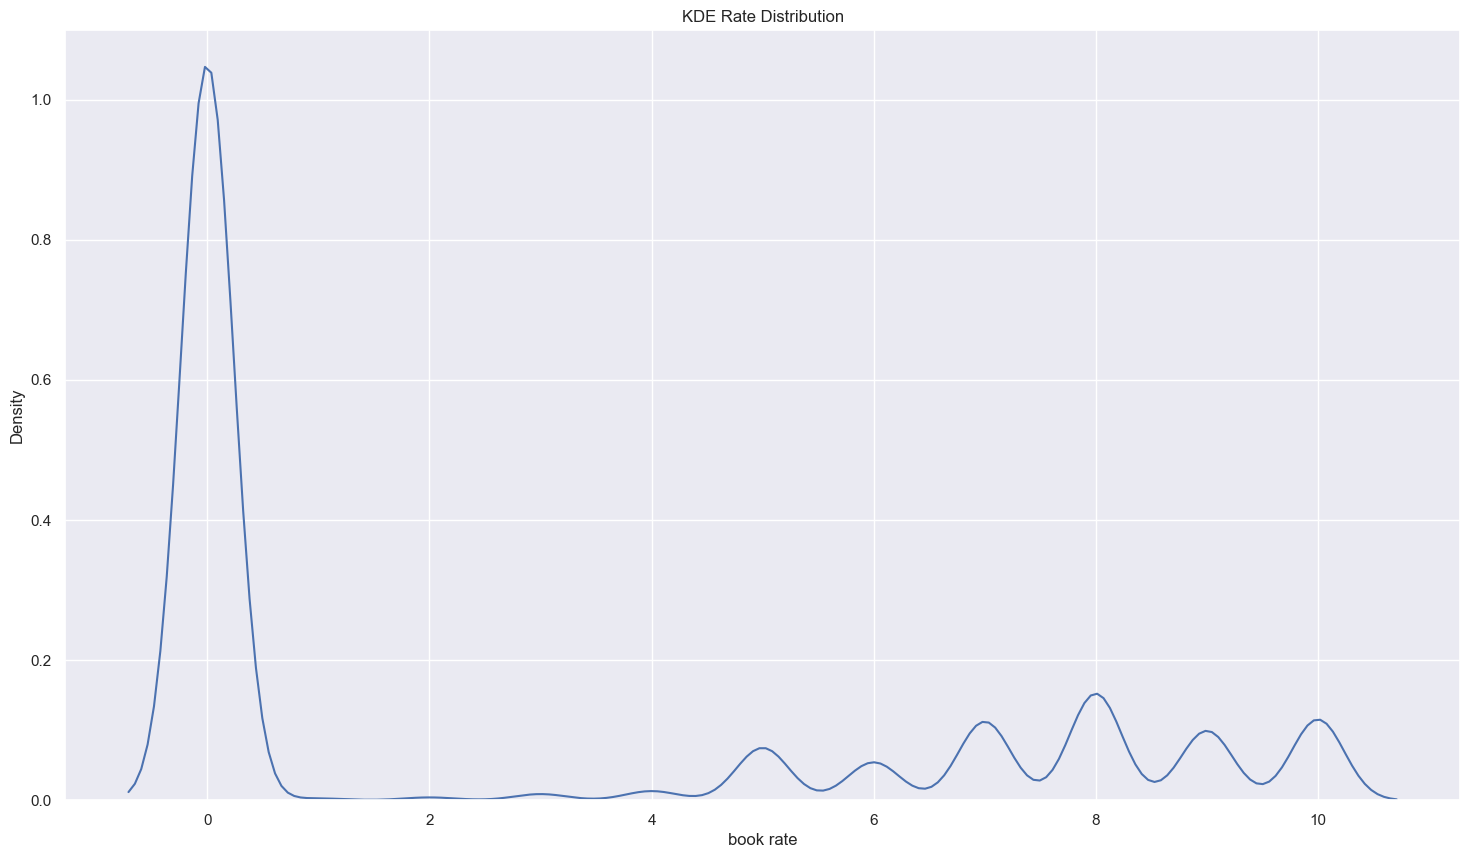

In [42]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(18, 10))

# kde plot
f = sns.kdeplot(ratings, x = 'Book-Rating')

# set titles and axis names
f.set_title('KDE of Rate Distribution')
f.set_xlabel('book rate')

In [43]:
# Book-Rating statistics

ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

#### Merge books and ratings dataframes together with inner join

In [44]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [45]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [46]:
# Inner join books and ratings on the ISBN column 

ratings_books = pd.merge(ratings, books, on = 'ISBN')

In [47]:
ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [48]:
ratings_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031136 non-null  object
 5   Year-Of-Publication  1031136 non-null  int64 
 6   Publisher            1031136 non-null  object
dtypes: int64(3), object(4)
memory usage: 62.9+ MB


In [49]:
# Define a book statistic function for visualisation 

def book_stat(column, sort): # column: Book-Title, Book-Author, Publisher || sort: count, mean
    
    df_stat = ratings_books.groupby(column).agg({'Book-Rating': ['count', 'mean', 'min', 'max']})
    out = df_stat['Book-Rating'].reset_index().sort_values(by = sort, ascending = False)
    
    return out

#### Popular Books

In [50]:
column = 'Book-Title'
sort = 'count'

popular_books = book_stat(column,sort).head(30)
popular_books

,Book-Title,count,mean,min,max
234951,Wild Animus,2502,1.019584,0,10
196326,The Lovely Bones: A Novel,1295,4.468726,0,10
183573,The Da Vinci Code,898,4.642539,0,10
5303,A Painted House,838,3.231504,0,10
199237,The Nanny Diaries: A Novel,828,3.530193,0,10
27922,Bridget Jones's Diary,815,3.527607,0,10
206502,The Secret Life of Bees,774,4.447028,0,10
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,3.437838,0,10
204387,The Red Tent (Bestselling Backlist),723,4.334716,0,10
14392,Angels &amp; Demons,670,3.708955,0,10


Text(0.5, 0, 'total')

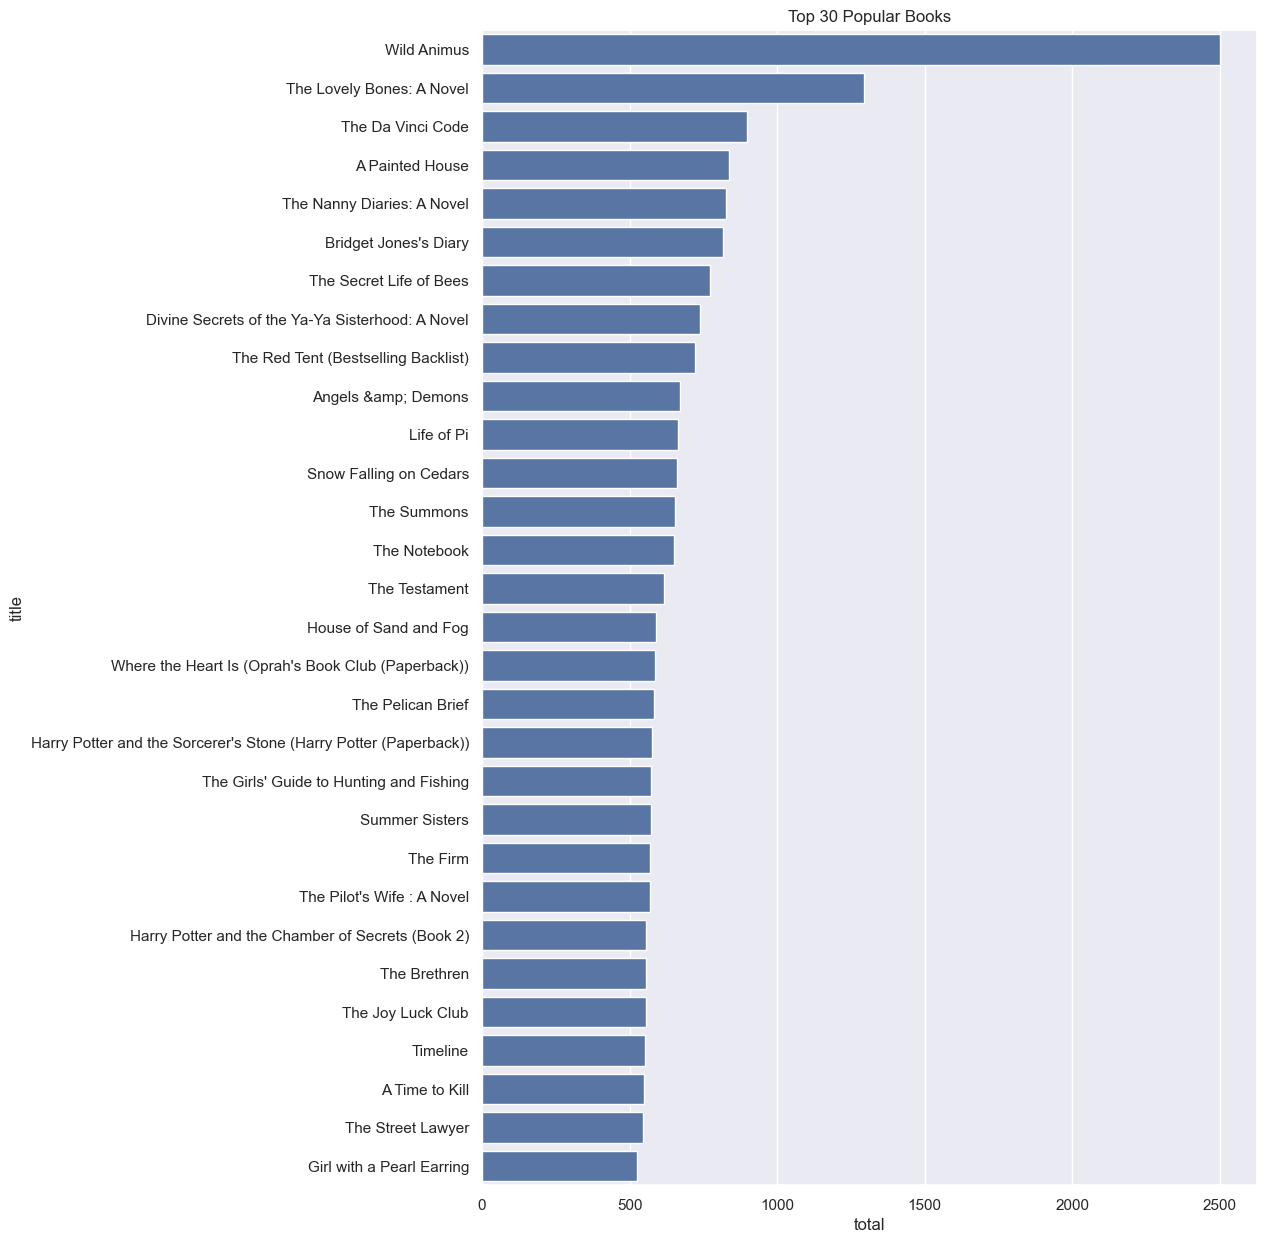

In [51]:
fig, ax = plt.subplots(figsize=(10, 15))


f = sns.barplot(data = popular_books, y = 'Book-Title', x = 'count', color = 'b')

f.set_title('Top 30 Popular Books')
f.set_ylabel('title')
f.set_xlabel('total')

Text(0.5, 0, 'rate')

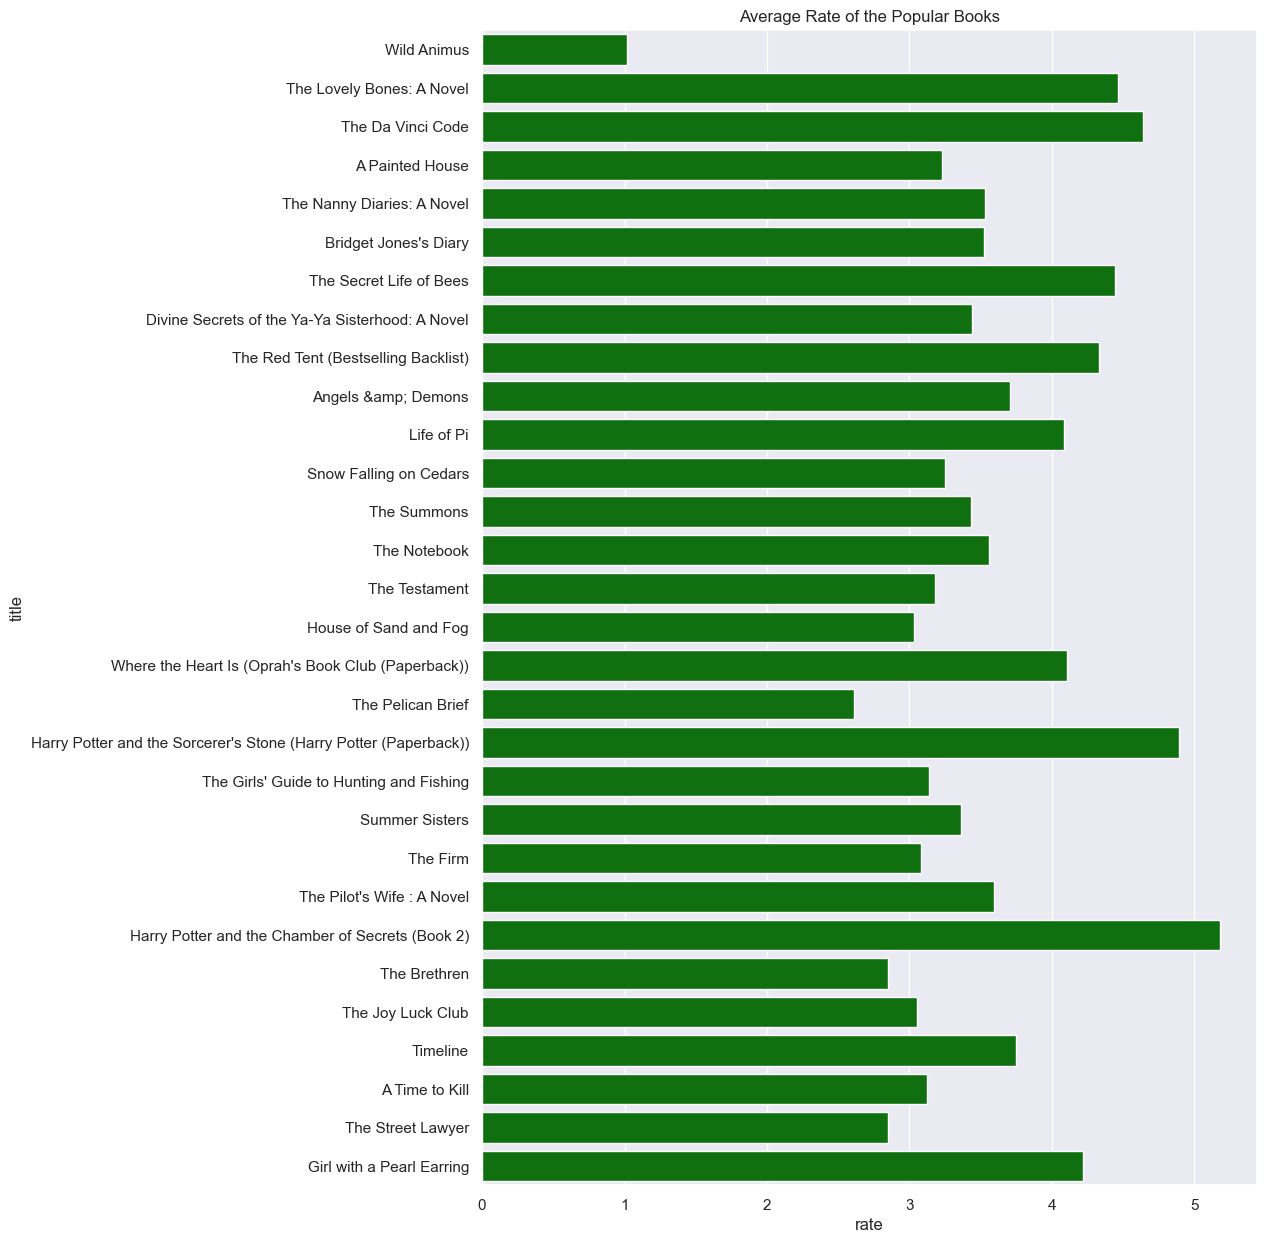

In [52]:
fig, ax = plt.subplots(figsize=(10, 15))


f = sns.barplot(data = popular_books, y='Book-Title', x = 'mean', color = 'green')

f.set_title('Average Rate of the Popular Books')
f.set_ylabel('title')
f.set_xlabel('rate')

#### Popular Authors

In [53]:
column = 'Book-Author'
sort = 'count'

popular_authors = book_stat(column,sort).head(30)
popular_authors

,Book-Author,count,mean,min,max
90802,Stephen King,10053,3.606287,0,10
73021,Nora Roberts,8429,2.659390,0,10
48762,John Grisham,6010,3.192013,0,10
42797,James Patterson,5845,3.143713,0,10
66134,Mary Higgins Clark,4777,2.634080,0,10
21430,Dean R. Koontz,4313,2.589613,0,10
95760,Tom Clancy,4036,2.221754,0,10
19264,Danielle Steel,3726,2.079442,0,10
91815,Sue Grafton,3457,2.758750,0,10
43812,Janet Evanovich,3350,3.533731,0,10


Text(0.5, 0, 'total')

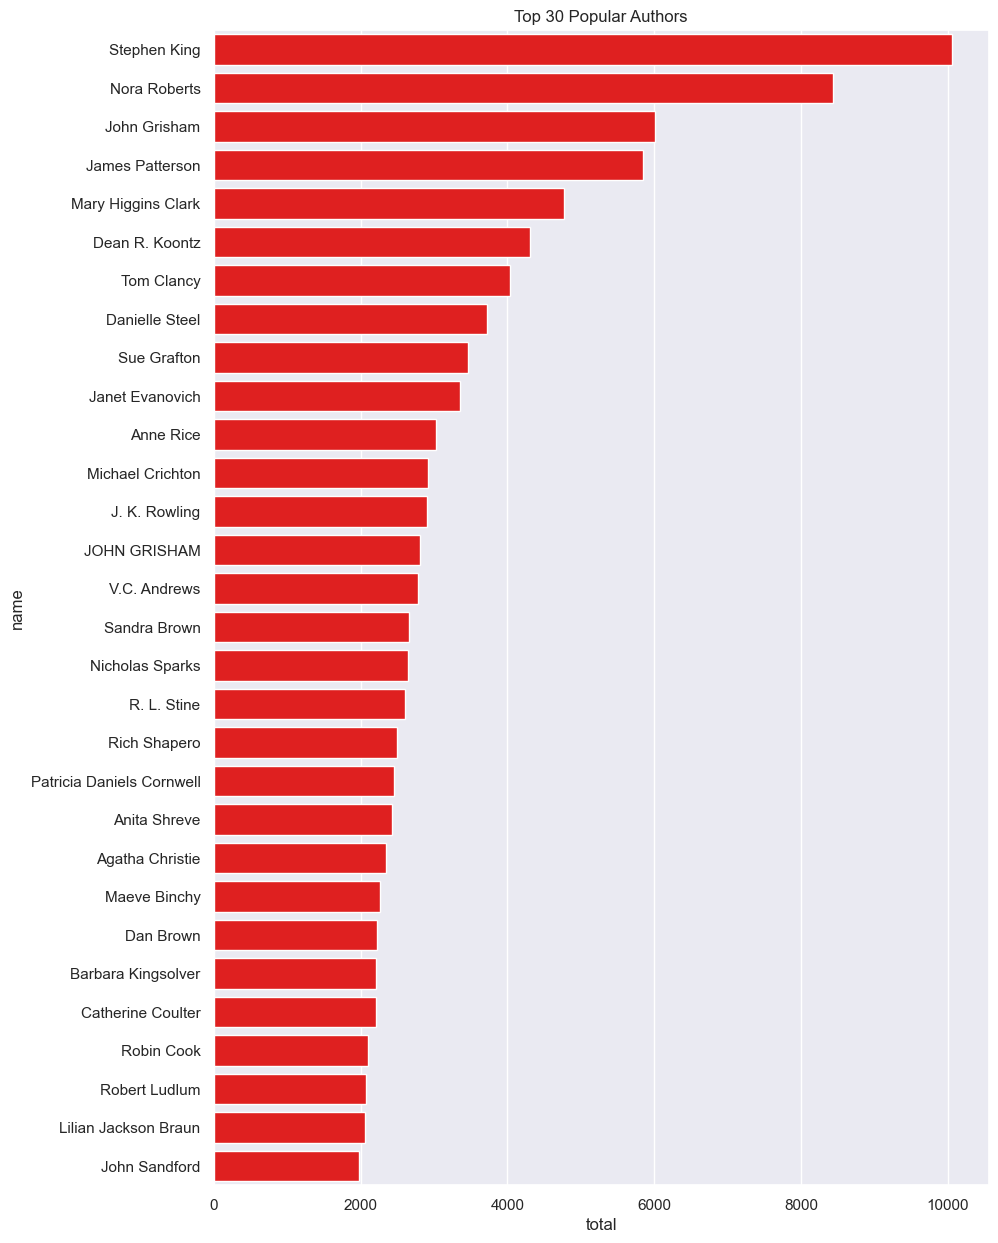

In [54]:
fig, ax = plt.subplots(figsize=(10, 15))


f = sns.barplot(data = popular_authors, y = 'Book-Author', x = 'count', color = 'red')

f.set_title('Top 30 Popular Authors')
f.set_ylabel('name')
f.set_xlabel('total')

#### Popular Publishers

In [55]:
column = 'Publisher'
sort = 'count'

popular_publ = book_stat(column,sort).head(30)
popular_publ

,Publisher,count,mean,min,max
1388,Ballantine Books,34724,2.801204,0,10
11712,Pocket,31989,2.498671,0,10
1714,Berkley Publishing Group,28614,2.424827,0,10
15863,Warner Books,25506,2.671293,0,10
6558,Harlequin,25027,1.439925,0,10
1418,Bantam Books,23598,2.327824,0,10
1414,Bantam,20008,2.877499,0,10
13596,Signet Book,19155,2.684991,0,10
1246,Avon,17352,2.447499,0,10
11341,Penguin Books,17033,3.203898,0,10


Text(0.5, 0, 'total')

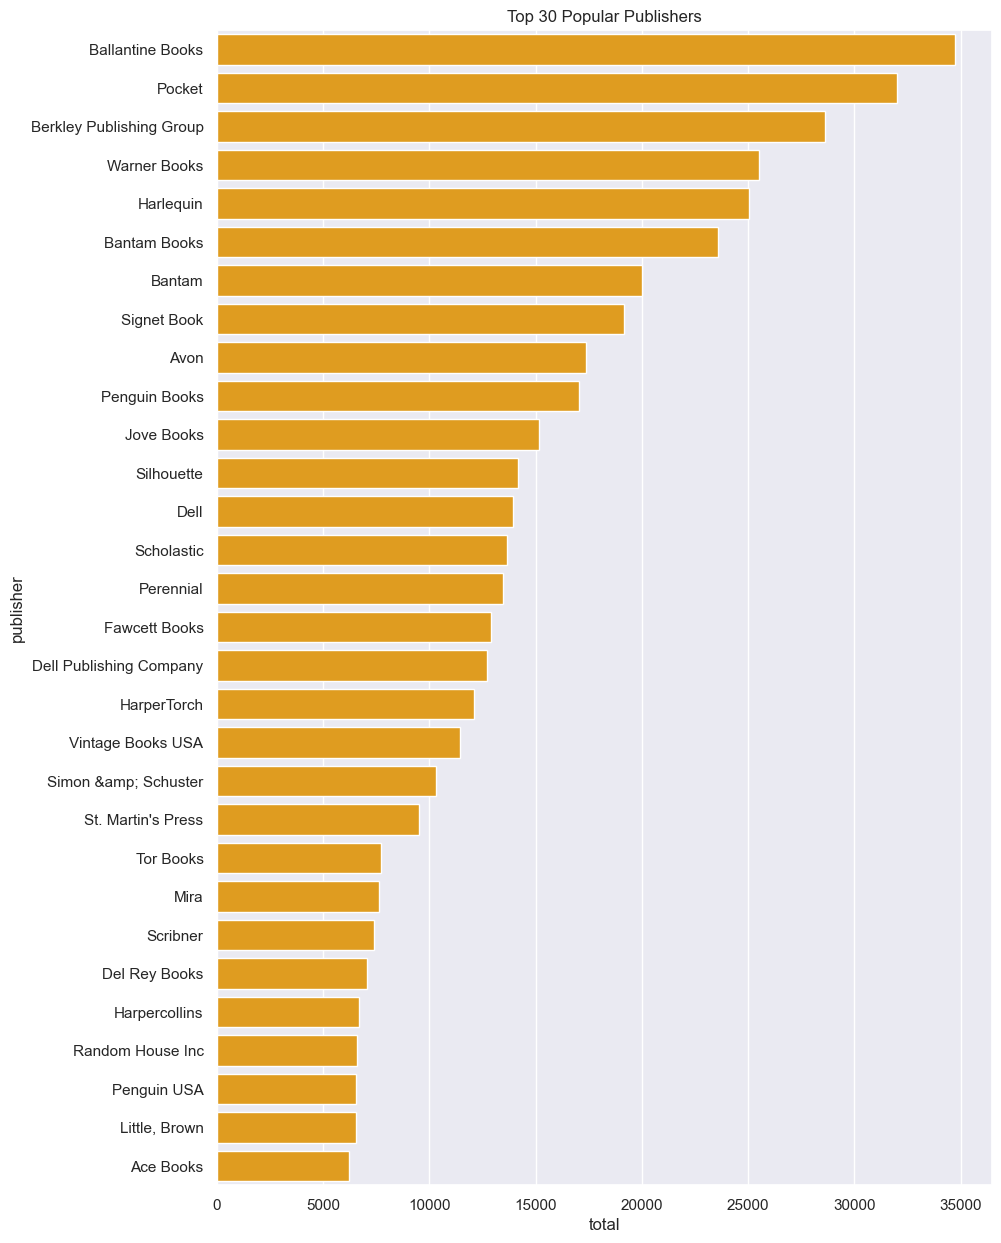

In [56]:
fig, ax = plt.subplots(figsize=(10, 15))


f = sns.barplot(data = popular_publ, y='Publisher', x = 'count', color = 'orange')

f.set_title('Top 30 Popular Publishers')
f.set_ylabel('publisher')
f.set_xlabel('total')

Text(0.5, 0, 'year')

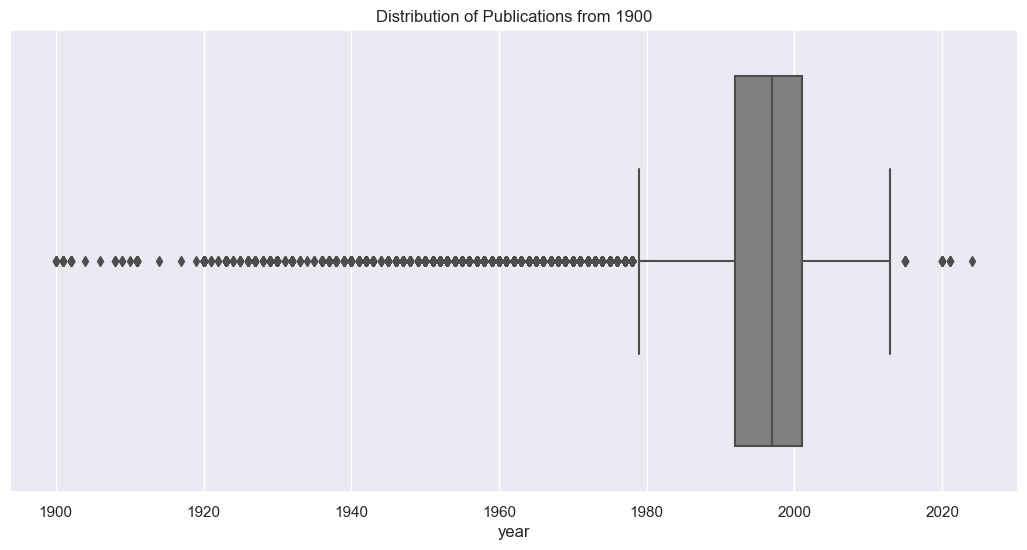

In [109]:
fig, ax = plt.subplots(figsize=(13, 6))

f = sns.boxplot(ratings_books[ratings_books["Year-Of-Publication"].isin(range(1900,2025))], x="Year-Of-Publication", color = 'gray')

f.set_title('Distribution of Publications from 1900')
f.set_xlabel('year')

In [58]:
column = 'Year-Of-Publication'
sort = 'count'

year_publ = book_stat(column,sort)
year_publ = year_publ[year_publ['Year-Of-Publication'].isin(range(1900,2025))]

Text(0.5, 0, 'year')

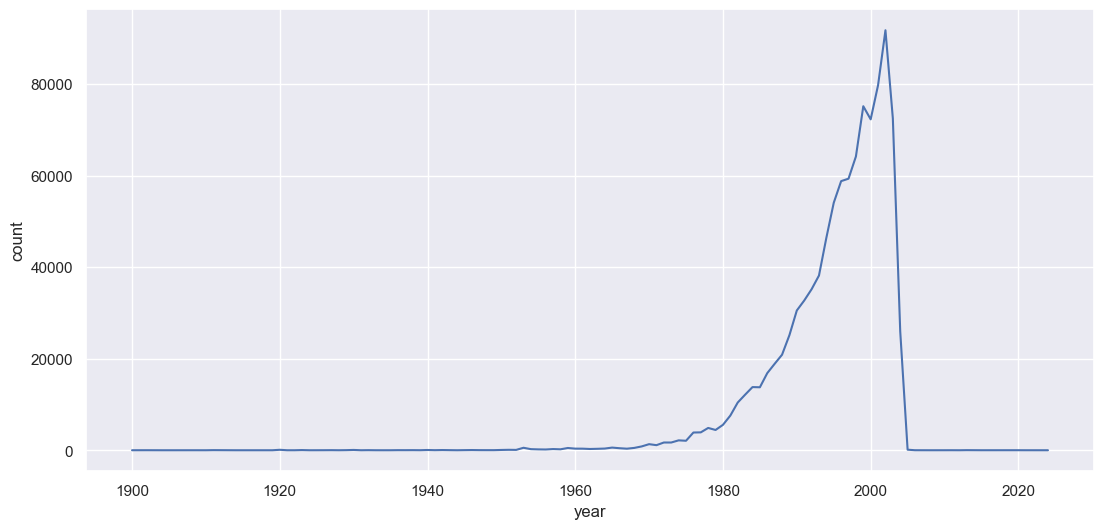

In [111]:
fig, ax = plt.subplots(figsize=(13, 6))


f = sns.lineplot(data = year_publ, x = 'Year-Of-Publication', y = 'count')

#f.set_title('Distribution of Publications from 1900')
f.set_xlabel('year')

#### Most Rated Books

In [60]:
# Best evaluated books with at least 50 rates

column = 'Book-Title'
sort = 'mean'

best_books = book_stat(column,sort)
best_books[best_books['count'] >= 50].head(30)

,Book-Title,count,mean,min,max
70396,Free,56,8.017857,0,10
208575,The Stand (The Complete and Uncut Edition),57,6.175439,0,10
77812,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667,0,10
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0,10
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0,10
195672,The Little Prince,141,5.815603,0,10
180518,The Cat in the Hat,53,5.754717,0,10
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0,10
191607,The Hobbit,80,5.700000,0,10
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,0,10


In [61]:
# Merge all dataframes

users_ratings_books = pd.merge(ratings_books, users, on = 'User-ID')

users_ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,usa


In [62]:
# Check the infos of the new dataframe

users_ratings_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031136 non-null  object
 5   Year-Of-Publication  1031136 non-null  int64 
 6   Publisher            1031136 non-null  object
 7   Country              1031136 non-null  object
dtypes: int64(3), object(5)
memory usage: 70.8+ MB


# 5. The KNN Model <a class="anchor" id="5"></a>

To build a book recommender system we try an item based (item-to-item) collaborative filtering approach. 
The basic idea behind this technique is to look for similar books based on books that users have already rated.
Precisely, we will implement the K-Neareast Neighbors algorithm to find clusters of similar books based on common book user ratings. The model predicts k books that have the most similar user engagement vectors.

***Steps***:

- Restrict our dataframe to most popular books (i.e. with at least 50 ratings)
- Convert our dataframe to a 2-dimensional sparse matrix
- Implement the K-Neareast Neighbors model


#### Filter our dataframe 

In [63]:
# Count the total number of ratings for each book title

df_stat = ratings_books.groupby('Book-Title').agg({'Book-Rating': ['count']})
total_ratings = df_stat['Book-Rating'].reset_index()

total_ratings

,Book-Title,count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [64]:
# total_ratings statistics

total_ratings.describe()

,count
count,241071.000000
mean,4.277312
std,16.738685
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2502.000000


In [65]:
# total_ratings quantiles

total_ratings['count'].quantile(np.arange(0.9,1, 0.01))

0.90     7.0
0.91     8.0
0.92     9.0
0.93    10.0
0.94    11.0
0.95    13.0
0.96    16.0
0.97    20.0
0.98    29.0
0.99    50.0
Name: count, dtype: float64

Notice that only the 1% of books recived more than 50 rates!

In [66]:
# Titles of popular books

titles_popular_books = total_ratings[total_ratings['count'] >= 50]['Book-Title'].values

# Restrict our dataframe 

df = users_ratings_books[users_ratings_books['Book-Title'].isin(titles_popular_books)]

In [104]:
proportion_of_popular_books = round((df.shape[0] / users_ratings_books.shape[0])*100,1)

print('Proportion of popular books rated by users: '+str(proportion_of_popular_books)+' %')

Proportion of popular books rated by users: 28.0 %


#### Sparse Matrix

We convert our dataframe to a 2d-matrix, and we fill its missing values with zeros.

In [68]:
# Sparse matrix

df_pivot = df.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating', aggfunc='first').fillna(0)

In [69]:
df_pivot 

User-ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we transform the values (i.e. ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

In [70]:
# import csr_matrix
from scipy.sparse import csr_matrix

# csr matrix
df_matrix = csr_matrix(df_pivot.values)

#### Model

Each row of the sparse matrix correspond to a book and it is a 47994-dimensional vector with integer values between 0 and 10 (the users ratings). 
Our algorithm computes the cosine similarity score between each pair of vectors (books). 
Then it clusters them into groups using the average rating of the k best nearest neighbors. 

In [71]:
from sklearn.neighbors import NearestNeighbors

# Initialize the model

model_knn = NearestNeighbors(metric= 'cosine', algorithm = 'brute')

In [72]:
# Fit the model

model_knn.fit(df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## 6. Book Recommendations <a class="anchor" id="6"></a>

#### Try the model

In [73]:
# Book title

title = 'It'

# Make Predictions

distances, indices = model_knn.kneighbors([df_pivot.loc[title].values], n_neighbors=6)

print(distances)
print(indices)

[[1.11022302e-16 7.70416463e-01 7.76833369e-01 7.78897711e-01
  7.79688513e-01 7.88889570e-01]]
[[ 925  384 1120 2205 1539 1198]]


In [74]:
# Books corresponding to indices

print(df_pivot.iloc[indices[0]].index.values)

['It' 'Christine' 'Misery' 'The Tommyknockers' 'Skeleton Crew'
 'Nightmares &amp; Dreamscapes']


In [75]:
# Authors corresponding to selected books

authors = []

for book in df_pivot.iloc[indices[0]].index.values:
    
    authors.append(books.at[books.loc[books['Book-Title'] == book].index[0], 'Book-Author'])

In [76]:
# Dataframe of selected books

pd.DataFrame({
    'Title'   : df_pivot.iloc[indices[0]].index.values,
    'Author'  : authors,
    'Distance': distances[0]
}).sort_values(by='Distance')

,Title,Author,Distance
0,It,Stephen King,1.110223e-16
1,Christine,Stephen King,7.704165e-01
2,Misery,Stephen King,7.768334e-01
3,The Tommyknockers,Stephen King,7.788977e-01
4,Skeleton Crew,Stephen King,7.796885e-01
5,Nightmares &amp; Dreamscapes,Stephen King,7.888896e-01


#### List of books

In [77]:
df_books = df['Book-Title'].unique()
df_books.sort()

In [78]:
for book in df_books:
    print(book)

10 Lb. Penalty
16 Lighthouse Road
1984
1st to Die: A Novel
2010: Odyssey Two
204 Rosewood Lane
2061: Odyssey Three
24 Hours
2nd Chance
3rd Degree
4 Blondes
50 Simple Things You Can Do to Save the Earth
84 Charing Cross Road
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash
A Bend in the Road
A Case of Need
A Child Called \It\": One Child's Courage to Survive"
A Civil Action
A Clockwork Orange (Norton Paperback Fiction)
A Cold Heart (Alex Delaware Novels (Paperback))
A Cold Heart: An Alex Delaware Novel
A Confederacy of Dunces
A Confederacy of Dunces (Evergreen Book)
A Cry In The Night
A Cup of Tea (Ballantine Reader's Circle)
A Dangerous Fortune
A Darkness More Than Night
A Day Late and a Dollar Short
A Density of Souls
A Fine Balance
A Game of Thrones (A Song of Ice and Fire, Book 1)
A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3)
A Gre

#### Recommender Function

In [79]:
def book_recommendation(title):
    
    # Make predictions with the algorithm
    distances, indices = model_knn.kneighbors([df_pivot.loc[title].values], n_neighbors=6)
    
    # Find authors
    authors = []

    for book in df_pivot.iloc[indices[0]].index.values:
        authors.append(books.at[books.loc[books['Book-Title'] == book].index[0], 'Book-Author'])
    
    # Recommendations dataframe
    out = pd.DataFrame({
    'Title'   : df_pivot.iloc[indices[0]].index.values,
    'Author'  : authors,
    'Similarity distance': distances[0]
     }).sort_values(by='Similarity distance')
    
    return out[1:]

In [80]:
book_recommendation('It')

,Title,Author,Similarity distance
1,Christine,Stephen King,0.770416
2,Misery,Stephen King,0.776833
3,The Tommyknockers,Stephen King,0.778898
4,Skeleton Crew,Stephen King,0.779689
5,Nightmares &amp; Dreamscapes,Stephen King,0.788890


In [81]:
book_recommendation('The Lord of the Rings (Movie Art Cover)')

,Title,Author,Similarity distance
1,Mere Christianity,C. S. Lewis,0.914405
2,Ragtime,E. L. Doctorow,0.920044
3,Where Are the Children?,Mary Higgins Clark,0.920142
4,Inner Harbor (Quinn Brothers (Paperback)),Nora Roberts,0.921017
5,The Shelters of Stone (Earth's Children Series...,JEAN M. AUEL,0.927209


In [82]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

,Title,Author,Similarity distance
1,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,0.462539
2,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,0.486439
3,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,0.616043
4,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,0.696098
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,0.703136


In [83]:
book_recommendation('Emma')

,Title,Author,Similarity distance
1,Anne of Green Gables,L.M. Montgomery,0.889364
2,Anne of the Island,Lucy Maud Montgomery,0.900307
3,Pride and Prejudice,Jane Austen,0.903885
4,Hawaii,James A. Michener,0.906458
5,Sex &amp; the City,Candace Bushnell,0.914805


In [89]:
def recommender():

    print('Choose a book and write its title:')

    title = str(input())
    
    if title not in df_books:
        print('Error. The book is not in the database!')
    else:
        print("Books similar to '"+title+"' you may like:")
        return book_recommendation(title)[1:]

#### Recommendations

In [90]:
recommender()

Choose a book and write its title:
It
Books similar to 'It' you may like:


,Title,Author,Similarity distance
2,Misery,Stephen King,0.776833
3,The Tommyknockers,Stephen King,0.778898
4,Skeleton Crew,Stephen King,0.779689
5,Nightmares &amp; Dreamscapes,Stephen King,0.788890


In [91]:
recommender()

Choose a book and write its title:
ff
Error. The book is not in the database!


In [92]:
recommender()

Choose a book and write its title:
The GREAT GATSBY (Scribner Classic)
Books similar to 'The GREAT GATSBY (Scribner Classic)' you may like:


,Title,Author,Similarity distance
2,The Mouse and the Motorcycle,Beverly Cleary,0.890091
3,Eva Luna,Isabel Allende,0.890826
4,She Walks These Hills,Sharyn McCrumb,0.900703
5,Prague : A Novel,ARTHUR PHILLIPS,0.901113


In [93]:
recommender()

Choose a book and write its title:
Eva Luna
Books similar to 'Eva Luna' you may like:


,Title,Author,Similarity distance
2,The GREAT GATSBY (Scribner Classic),F. Scott Fitzgerald,0.890826
3,Paula,Isabel Allende,0.893577
4,A Portrait of the Artist As a Young Man,James Joyce,0.897733
5,Prague : A Novel,ARTHUR PHILLIPS,0.899029


In [94]:
recommender()

Choose a book and write its title:
Name of the Rose
Books similar to 'Name of the Rose' you may like:


,Title,Author,Similarity distance
2,Exodus,Leon Uris,0.898753
3,The Edible Woman,Margaret Atwood,0.903232
4,Brideshead Revisited,Evelyn Waugh,0.920170
5,Women in His Life,Barbara Taylor Bradford,0.922000
